# **Sprint 9 - Proyecto**
---

## **Descripción del Proyecto**

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de **"Showz"**, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

- Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.

Lo que vas a investigar: 

- Cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.


## **Paso 1. Acceda los datos y prepáralos para el análisis**
---

In [ ]:
# Importando librerías:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Función para cargar archivos corrigiendo los nombres de las columnas:
def cargar_archivo(direccion):
    df = pd.read_csv(direccion)
    columns = []

    for element in list(df.columns):
        element = element.lower().replace(' ', '_').strip()
        columns.append(element)

    df.columns = columns
    return df

In [3]:
# Cargando archivos:
costs = cargar_archivo('datasets/costs_us.csv')
orders_log = cargar_archivo('datasets/orders_log_us.csv')
visits_log = cargar_archivo('datasets/visits_log_us.csv')

### **Preparación de datos:**

#### **Data Frame "costs":**

In [4]:
# Examinando contenido de "costs"
print(costs.info())
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [5]:
# Convirtiendo columna "dt" al tipo datetime
costs['dt'] = pd.to_datetime(costs['dt'])

#### **Data Frame "orders_log":**

In [6]:
# Examinando contenido de "orders_log"
print(orders_log.info())
display(orders_log.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
# Convirtiendo columna "Buy Ts" al tipo datetime
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])

#### **Data Frame "visists_log":**

In [8]:
# Examinando contenido de "visits_log"
print(visits_log.info())
display(visits_log.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
# Convirtiendo columnas "end_ts" y "start_ts" al tipo datetime
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])

## **Paso 2. Haz informes y calcula métricas**
---

### **1. Visitas:**

#### 1. ¿Cuántas personas lo usan cada día, semana y mes?

In [10]:
# Creando nuevas columans "visit_day", "visit_week", "visit_month"
visits_log['visit_day'] = visits_log['start_ts'].dt.date
visits_log['visit_week'] = (pd.to_datetime(visits_log['start_ts'], unit='d') - pd.to_timedelta(visits_log['start_ts'].dt.day_of_week, unit='d')).dt.date
visits_log['visit_month'] = visits_log['start_ts'].dt.to_period('M')

In [11]:
# Contando el número de usuarios para cada dia
dau = visits_log.groupby('visit_day').agg({'uid':'nunique'})
# Contando el número de usuarios para cada semana
wau = visits_log.groupby('visit_week').agg({'uid':'nunique'})
# Contando el número de usuarios para cada mes
mau = visits_log.groupby('visit_month').agg({'uid':'nunique'})

In [12]:
print('¿Cuántas personas lo usan cada día, semana y mes?')
# Mostrando dau:
print('DAU promedio:', round(dau.mean().iloc[0], 2))
# Mostrando wau:
print('WAU promedio:', round(wau.mean().iloc[0], 2))
# Mostrando mau:
print('MAU promedio:', round(mau.mean().iloc[0], 2))

¿Cuántas personas lo usan cada día, semana y mes?
DAU promedio: 907.99
WAU promedio: 5716.25
MAU promedio: 23228.42


#### 2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)

In [13]:
# Contando el número de usuarios y número de visitas al día
session_by_day = visits_log.groupby('visit_day').agg({'uid':['nunique', 'count']}).reset_index()
    # Renombrando columnas
session_by_day.columns = ['visit_day', 'n_users', 'n_visits']
# Calculando proporción.¿Cuántas sesiones tiene un usuario al día?
session_by_day['proporción'] = session_by_day['n_visits'] / session_by_day['n_users']

print('¿Cuántas sesiones hay por día?')
print(f'En promedio, al día se registran: {session_by_day["n_visits"].mean():.2f} sesiones.')

display(session_by_day.sample(5))

¿Cuántas sesiones hay por día?
En promedio, al día se registran: 987.36 sesiones.


,visit_day,n_users,n_visits,proporción
232,2018-01-19,1173,1277,1.088662
152,2017-10-31,1259,1366,1.084988
315,2018-04-13,946,1020,1.078224
347,2018-05-15,755,832,1.101987
92,2017-09-01,572,623,1.089161


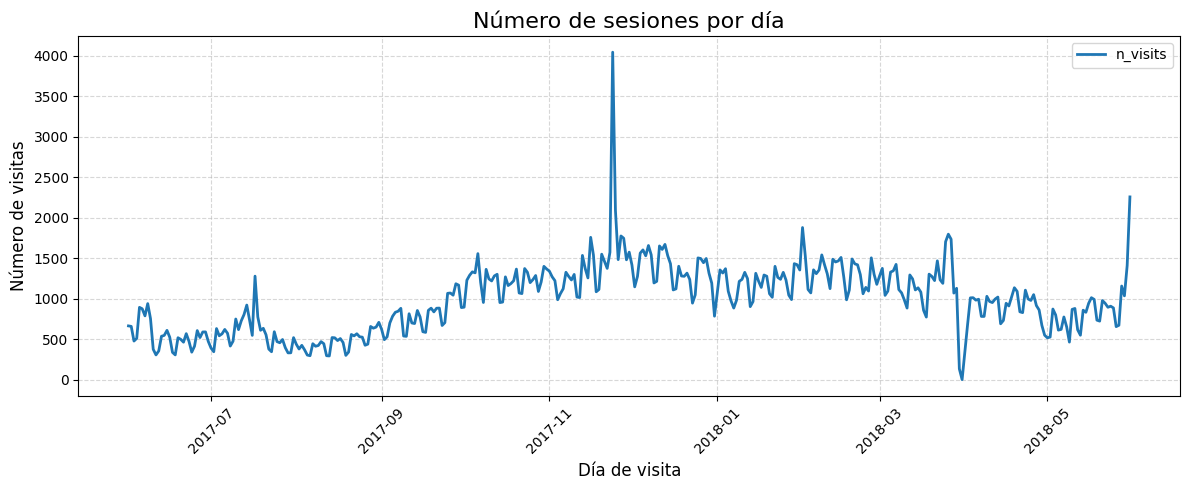

In [14]:
# Graficar
session_by_day.plot(x='visit_day', y='n_visits', linewidth=2, figsize=(12, 5))

# Personalizar la gráfica
plt.title('Número de sesiones por día', fontsize=16)
plt.xlabel('Día de visita', fontsize=12)
plt.ylabel('Número de visitas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='x', rotation=45)

# Mostrar
plt.tight_layout()
plt.show()


#### 3. ¿Cuál es la duración de cada sesión?

In [15]:
# Calculando la duración de cada sesión
visits_log['duration'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds

print(f'La duración promedio de cada sesión es de: {visits_log["duration"].mean():.2f} segundos.')
# Mostrando DataFrame con columna nueva
display(visits_log.head())

La duración promedio de cada sesión es de: 643.51 segundos.


,device,end_ts,source_id,start_ts,uid,visit_day,visit_week,visit_month,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12,0


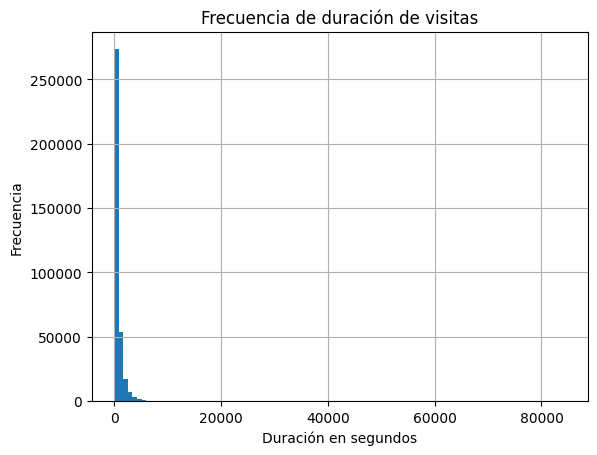

In [16]:
# Graficar
visits_log['duration'].hist(bins=100)

plt.title('Frecuencia de duración de visitas')
plt.xlabel('Duración en segundos')
plt.ylabel('Frecuencia')
plt.show()

#### 4. ¿Con qué frecuencia los usuarios regresan?

In [17]:
# Encontrar la fecha de la primer visita de cada usuario
first_visit_by_user = visits_log.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visit_by_user.columns = ['uid', 'first_visit_ts']

In [18]:
# Extrayendo día y mes de la primera visita de cada usuario en columnas nuevas
first_visit_by_user['first_visit_day'] = first_visit_by_user['first_visit_ts'].dt.date
first_visit_by_user['first_visit_week'] = (pd.to_datetime(first_visit_by_user['first_visit_ts'], unit='d') - pd.to_timedelta(first_visit_by_user['first_visit_ts'].dt.day_of_week, unit='d')).dt.date
first_visit_by_user['first_visit_month'] = first_visit_by_user['first_visit_ts'].dt.to_period('M')

In [19]:
# Uniendo con el dataframe "visits_log"
visits_log = pd.merge(visits_log, first_visit_by_user, on='uid', how='left')

In [20]:
# Tasa de Retención
    # Ciclos de vida en meses
visits_log['age_months'] = (visits_log['visit_month'].astype('int') - visits_log['first_visit_month'].astype('int'))

# Mostrando resultado de las columnas nuevas
display(visits_log.head(4))

,device,end_ts,source_id,start_ts,uid,visit_day,visit_week,visit_month,duration,first_visit_ts,first_visit_day,first_visit_week,first_visit_month,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12,1080,2017-12-20 17:20:00,2017-12-20,2017-12-18,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02,1680,2018-02-19 16:53:00,2018-02-19,2018-02-19,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07,0,2017-07-01 01:54:00,2017-07-01,2017-06-26,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05,1440,2018-03-09 20:05:00,2018-03-09,2018-03-05,2018-03,2


In [21]:
# Encontrando numero de usuarios únicos que tuvieron almenos una visita, agrupados por cohorte y por mes de vida
cohorts_months = visits_log.groupby(['first_visit_month','age_months']).agg({'uid':'nunique'}).reset_index()

# Encontrando la cantidad de usuarios inicial en cada cohorte
initial_count = cohorts_months.query('age_months == 0')[['first_visit_month', 'uid']]
    # Renombrando columnas
initial_count.columns = ['first_visit_month', 'cohorts_users']

# Uniendo dfs, asignando la cantidad de usuarios inicial de cada cohorte a cada registro en relación con la cohorte a la que pertenece
cohorts_months = pd.merge(cohorts_months, initial_count, on='first_visit_month')

In [22]:
# Calculando tasa de retención
cohorts_months['retention'] = (cohorts_months['uid'] / cohorts_months['cohorts_users'])*100

In [23]:
# Creando pivot table
cohorts_pivot = cohorts_months.pivot_table(
    columns='age_months',
    index='first_visit_month',
    values='retention'
)
# Mostrando pivottable
display(cohorts_pivot.fillna(''))

age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,100.0,7.866355,5.377479,6.139226,6.855721,7.142318,6.101516,5.777208,5.234181,5.08334,4.065163,4.49506
2017-07,100.0,5.608828,5.129376,5.616438,5.821918,4.817352,4.535769,4.57382,3.881279,2.861492,2.747336,
2017-08,100.0,7.690797,6.286219,6.276397,5.009331,4.400354,3.634221,3.948532,2.78951,2.602888,,
2017-09,100.0,8.548851,6.920498,5.070642,3.939176,3.783525,3.585967,2.418582,2.280891,,,
2017-10,100.0,7.8608,5.223852,3.895754,3.426108,3.222081,2.136505,2.036417,,,,
2017-11,100.0,7.828097,4.411333,3.868174,3.372725,2.341456,2.179977,,,,,
2017-12,100.0,5.58018,3.799272,3.110654,2.026278,1.903593,,,,,,
2018-01,100.0,5.971535,3.933876,2.497348,2.024399,,,,,,,
2018-02,100.0,5.707979,2.545389,2.009281,,,,,,,,


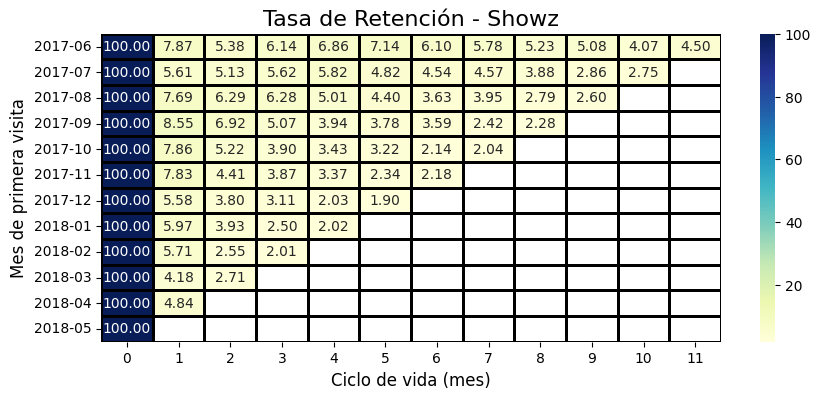

In [24]:
# Creando un mapa de calor para visualizar la tasa de retención
plt.figure(figsize=(10, 4))
sns.heatmap(
    cohorts_pivot,
    annot=True,
    linewidths=1,
    linecolor='black',
    fmt='.2f',
    cmap='YlGnBu'
)
# Formateando gráfico con plt
plt.title('Tasa de Retención - Showz', fontsize=16)
plt.xlabel('Ciclo de vida (mes)', fontsize=12)
plt.ylabel('Mes de primera visita', fontsize=12)

plt.show()

💡 **¿Con qué frecuencia los usuarios regresan?**

A partir del mapa de calor se observa que **la tasa de retención disminuye drásticamente después del primer mes de vida en todas las cohortes**, cayendo del 100 % a menos del 8 %. A partir de ese punto, la retención continúa disminuyendo, pero a un ritmo mucho más moderado durante los meses siguientes. Destaca la cohorte de junio de 2017, que conserva al 4.5 % de sus usuarios activos tras 11 meses.

Este comportamiento sugiere que *los usuarios no visitan el sitio con frecuencia* para adquirir boletos o consultar eventos. De hecho, solo alrededor del 5 % de los usuarios continúa accediendo mensualmente, lo que indica un interés esporádico por parte de la mayoría del público.

### **2. Ventas:**

#### 1. ¿Cuándo empieza la gente a comprar?
(En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [25]:
# Obteniendo la primera compra por usuario
first_buys = orders_log.groupby('uid').agg({'buy_ts':'min'})
    # Renombrando las columnas
first_buys.rename(columns={'buy_ts':'first_buy_ts'}, inplace=True)

In [26]:
# Extrayendo día y mes para cada primera compra
first_buys['first_buy_day'] = first_buys['first_buy_ts'].dt.date
first_buys['first_buy_month'] = first_buys['first_buy_ts'].dt.to_period('M')

In [27]:
# Uniendo data frame
orders_log = orders_log.merge(first_buys, on='uid', how='left')

In [28]:
# Extrayendo día y mes de cada compra
orders_log['buy_day'] = orders_log['buy_ts'].dt.date
orders_log['buy_month'] = orders_log['buy_ts'].dt.to_period('M')
orders_log.head(5)

,buy_ts,revenue,uid,first_buy_ts,first_buy_day,first_buy_month,buy_day,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06,2017-06-01,2017-06


In [29]:
# Uniendo dataframes
buyers = orders_log.merge(first_visit_by_user, on='uid', how='left')
# Creando la columna "days_to_buy"
buyers['days_to_buy'] = (pd.to_datetime(buyers['first_buy_day']) - pd.to_datetime(buyers['first_visit_day'])).dt.days
# Filtrando solo la información única de cada cliente
buyers_unique = buyers[~buyers['uid'].duplicated()]
# Mostrando Número de compradores para cada categoría
print('Número de compradores para cada categoría:')
display(buyers_unique['days_to_buy'].value_counts().reset_index().head(15))

Número de compradores para cada categoría:


,days_to_buy,count
0,0,25039
1,1,1966
2,2,685
3,3,452
4,4,386
5,5,307
6,6,264
7,7,237
8,8,216
9,9,162


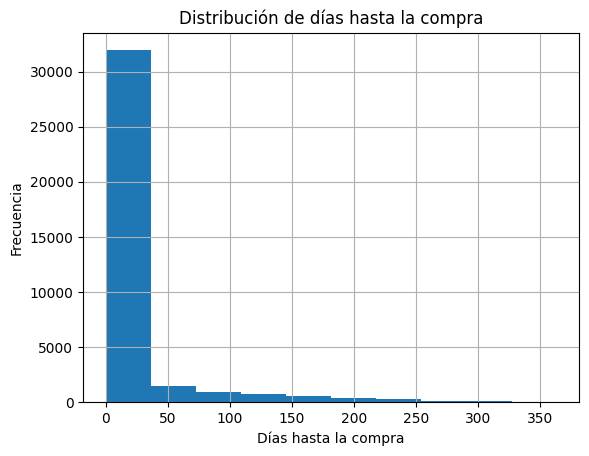

In [30]:
# Creando histograma
buyers_unique['days_to_buy'].hist(bins=10)

plt.title('Distribución de días hasta la compra')
plt.xlabel('Días hasta la compra')
plt.ylabel('Frecuencia')
plt.show()

💡 **¿Cuándo empieza la gente a comprar?**

Se observa que la gran mayoría de los **compradores** realizan su primera compra el mismo día que visitan por primera vez la página web. El histograma muestra el comportamiento de los **usuarios** y cuantos días les toma en *convertirse* en **compradores**. 

Es muy importante mencionar que el gráfico no considera a los usuarios que han visitado el sitio pero que jamás han realizado una compra. Dicha población es muy grande y seguramente puede brindar información valiosa.

#### 2. ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [31]:
# Calculando edad de cada cohorte (La cohorte es definida ahora por la fecha del primer pedido)
buyers['age'] = buyers['buy_month'].astype('int') - buyers['first_buy_month'].astype('int')

In [32]:
# Encontrando el número de compras para cada ciclo de vida, tamaño de cohorte y suma de las ganancias por mes en cada cohorte
buyers_cohorts_totals = buyers.groupby(['first_buy_month', 'age']).agg({'uid':['count','nunique'], 'revenue':'sum'}).reset_index()
    # Renombrando columnas
buyers_cohorts_totals.columns = ['first_buy_month', 'age', 'orders_count', 'buyers', 'cohort_revenue_month']

    # Encontrando tamaño de cohorte
initial_buyers_count = buyers_cohorts_totals.query('age == 0')[['first_buy_month', 'buyers']]
    # Renombrando columnas
initial_buyers_count = initial_buyers_count.rename(columns={'buyers':'cohort_clients'}) 

# Uniendo Df's
buyers_cohorts_totals = buyers_cohorts_totals.merge(initial_buyers_count, on='first_buy_month', how='left')

In [33]:
# Calculando el promedio de ventas por usuario en una cohorte mes con mes
buyers_cohorts_totals['avg_orders'] = buyers_cohorts_totals['orders_count'] / buyers_cohorts_totals['cohort_clients']

display(buyers_cohorts_totals.head(5)) 

,first_buy_month,age,orders_count,buyers,cohort_revenue_month,cohort_clients,avg_orders
0,2017-06,0,2354,2023,9557.49,2023,1.163618
1,2017-06,1,177,61,981.82,2023,0.087494
2,2017-06,2,174,50,885.34,2023,0.086011
3,2017-06,3,226,54,1931.30,2023,0.111715
4,2017-06,4,292,88,2068.58,2023,0.144340


In [34]:
# Creando pivot table
buyers_orders_pivot = buyers_cohorts_totals.pivot_table(
    columns='age',
    index='first_buy_month',
    values='avg_orders'
)

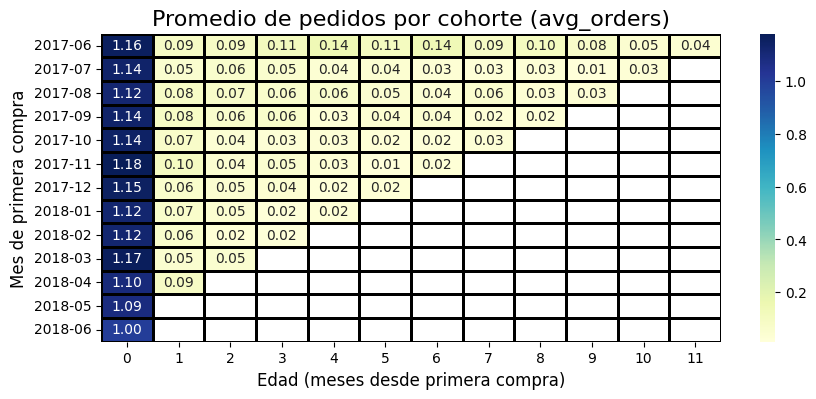

In [35]:
# Creando mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(
    buyers_orders_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gráfico con plt
plt.title("Promedio de pedidos por cohorte (avg_orders)", fontsize=16)
plt.xlabel("Edad (meses desde primera compra)", fontsize=12)
plt.ylabel("Mes de primera compra", fontsize=12)
plt.show()

💡 **¿Cuántos pedidos hacen durante un período de tiempo dado?**

El mapa de calor muestra el promedio de pedidos por usuario en cada cohorte y mes desde su primera compra. Se destaca lo siguiente:

- En todos los casos, el mes 0 (es decir, el mes en que los usuarios realizan su primera compra) muestra un promedio de pedidos por usuario superior a 1. Esto sugiere que, en promedio, cada usuario realiza más de una compra en su primer mes como cliente.

- A partir del segundo mes (age = 1), el promedio de pedidos por usuario cae abruptamente, situándose generalmente en valores cercanos a 0.05–0.10. Esto indica que, en los meses posteriores, cada usuario realiza menos de una compra por mes.

- Este patrón de fuerte caída en la actividad se repite de forma consistente entre las diferentes cohortes. No se observa una cohorte claramente destacada en términos de retención o recurrencia de compra.

🧠 **Conclusión**:

La actividad de los clientes se reduce drásticamente a partir del primer mes de ciclo de vida. Existe una clara oportunidad de trabajar en estrategias que busquen aumentar la actividad de los clientes y extender el ciclo de vida activo mas allá de únicamente el primer mes.

#### 3. ¿Cuál es el tamaño promedio de compra?

In [36]:
# Calculando las ganancias por compra para cada mes en cada cohorte
buyers_cohorts_totals['avg_revenue'] = buyers_cohorts_totals['cohort_revenue_month'] / buyers_cohorts_totals['orders_count']
buyers_cohorts_totals.head()

,first_buy_month,age,orders_count,buyers,cohort_revenue_month,cohort_clients,avg_orders,avg_revenue
0,2017-06,0,2354,2023,9557.49,2023,1.163618,4.060106
1,2017-06,1,177,61,981.82,2023,0.087494,5.547006
2,2017-06,2,174,50,885.34,2023,0.086011,5.088161
3,2017-06,3,226,54,1931.30,2023,0.111715,8.545575
4,2017-06,4,292,88,2068.58,2023,0.144340,7.084178


In [37]:
# Creando pivot table
buyers_revenue_pivot = buyers_cohorts_totals.pivot_table(
    index='first_buy_month',
    columns='age',
    values='avg_revenue'
)

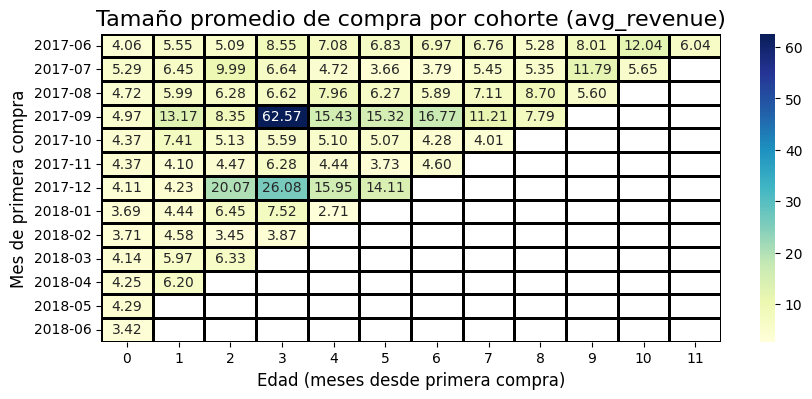

In [38]:
# Mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(
    buyers_revenue_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gráfico con plt
plt.title("Tamaño promedio de compra por cohorte (avg_revenue)", fontsize=16)
plt.xlabel("Edad (meses desde primera compra)", fontsize=12)
plt.ylabel("Mes de primera compra", fontsize=12)
plt.show()

💡 **¿Cuál es el tamaño promedio de compra?**

A partir del mapa de calor se observa que la gran mayoría de los meses se cuenta con un tamaño promedio de compra de alrededor de 4 - 10, lo que sugiere un gasto moderado y relativamente estable. 

Se destacan la cohorte 2017-09 y la cohorte 2017-12:

- **Cohorte 2017-09:**

Esta cohorte presenta un valor muy alto de 62.57 en el mes 3, y manteniendo valores relativamente altos en meses posteriores. Esto podría deberse a un pequeño número de usuarios que realizaron compras inusualmente grandes, lo que sugiere un posible nicho de clientes de alto valor. También podrías tratarse de anomalías en los datos que ameritan revisión.

- **Cohorte 2017-12:**

A partir del mes 2, esta cohorte también muestra un comportamiento llamativo, con tamaños promedio de compra superiores a 20 en los meses 2 y 3. Posteriormente el valor cae a 15 pero esto sigue siento mayor al promedio, lo que podría sugerir una promoción o campaña específica en ese periodo que incentivó compras de mayor volumen.

🧠 **Conclusión**:

Las cohortes 2017-09 y 2017-12 muestran comportamientos atípicos con pedidos significativamente más grandes, lo que puede indicar la existencia de **clientes de alto valor**, **eventos especiales**, **o problemas de calidad de datos**. Es de suma importancia *descartar errores en la captura de los datos* y posteriormente identificar cuales son los registros que provocan este comportamiento particular, encontrando a los **clientes de alto valo**r (si los hubiera).

#### 4. ¿Cuánto dinero traen? (LTV)

In [39]:
# Calculando ltv
buyers_cohorts_totals['ltv'] = buyers_cohorts_totals['cohort_revenue_month'] / buyers_cohorts_totals['cohort_clients']
buyers_cohorts_totals.head()

,first_buy_month,age,orders_count,buyers,cohort_revenue_month,cohort_clients,avg_orders,avg_revenue,ltv
0,2017-06,0,2354,2023,9557.49,2023,1.163618,4.060106,4.724414
1,2017-06,1,177,61,981.82,2023,0.087494,5.547006,0.485329
2,2017-06,2,174,50,885.34,2023,0.086011,5.088161,0.437637
3,2017-06,3,226,54,1931.30,2023,0.111715,8.545575,0.954671
4,2017-06,4,292,88,2068.58,2023,0.144340,7.084178,1.022531


In [40]:
# Creando pivot table
buyers_ltv_pivot = buyers_cohorts_totals.pivot_table(
    index='first_buy_month',
    columns='age',
    values='ltv'
)

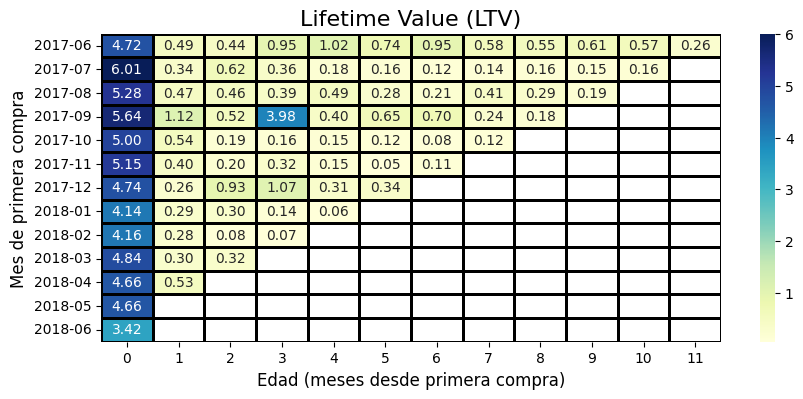

In [41]:
# Mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(
    buyers_ltv_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gráfico con plt
plt.title("Lifetime Value (LTV)", fontsize=16)
plt.xlabel("Edad (meses desde primera compra)", fontsize=12)
plt.ylabel("Mes de primera compra", fontsize=12)
plt.show()

In [42]:
acc_ltv = buyers_cohorts_totals.groupby('first_buy_month').agg({'ltv':'sum'}).reset_index()
display(acc_ltv)

,first_buy_month,ltv
0,2017-06,11.879234
1,2017-07,8.386854
2,2017-08,8.471723
3,2017-09,13.435227
4,2017-10,6.360242
5,2017-11,6.395244
6,2017-12,7.639913
7,2018-01,4.940151
8,2018-02,4.587921
9,2018-03,5.455253


💡 **¿Cuánto dinero traen? (LTV)**

- Se observa que el comportamiento de el LTV para cada cohorte nuevamente presenta un pico inicial seguido de una caida rápida. En todas las cohortes, el valor más alto de LTV ocurre en el mes 0, es decir, en el mes de la primera compra. Posteriormente, los valores caen bruscamente, lo que indica que la mayoría del valor del cliente se captura en su primer mes.

- Después del primer mes, los LTV mensuales rara vez superan los 0.5 - 1. Esto refuerza lo visto anteriormente: los clientes tienen poca actividad mes con mes, lo que sugiere que las ganancias de Showz dependen de la adquisición continua de nuevos clientes.

- Se observa que las cohortes 2017-09 y 2017-12 son nuevamente las mas interesantes.

🧠 **Conclusión**:

A partir de la visualización y análisis de el LTV par cada cohorte, se observa nuevamente que los clientes no tienen actividad recurrente, si no que el máximo beneficio se obtiene en el mes 0 de actividad. 

Se recomienda reforzar las estrategias de retención de usuarios y realizar una segmentación de las cohortes mas valiosas, analizando lo que las vuelve diferentes, como lo puede ser la fuente de anuncios que los atrajo (marketing).

### **3. Marketing:**

#### 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [43]:
# Gasto total de campañas de markerting
print('Las campañas de marketing sumaron un gasto total de:')
print(costs['costs'].sum())

Las campañas de marketing sumaron un gasto total de:
329131.62


In [44]:
# Gasto total para cada fuente de adquisición:
print('Cada fuente de adquisición gastó un total de:')
display(costs.groupby('source_id')['costs'].sum().reset_index().sort_values(by='costs', ascending=False))

Cada fuente de adquisición gastó un total de:


,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


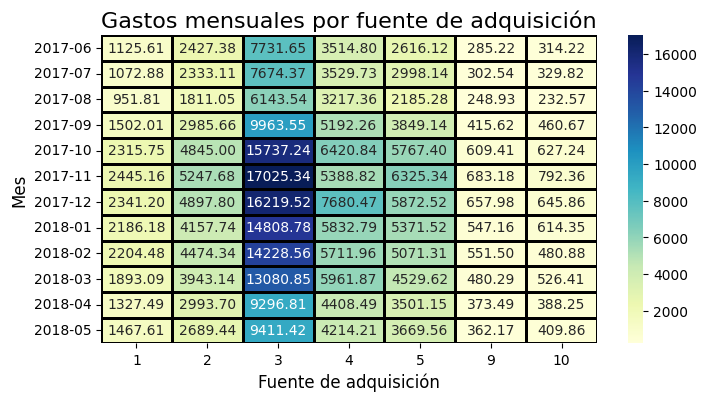

In [45]:
# Gasto para cada fuente de adquisición mes a mes:
    # Extrayendo mes con formato period
costs['month'] = costs['dt'].dt.to_period('M')
    # Sumando gastos para cada fuente de adquisición en cada mes:
monthly_costs = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()

# Creando pivot table:
monthly_costs_pivot = monthly_costs.pivot_table(
    columns='source_id',
    index='month',
    values='costs'
)

# Gráfico de calor:
plt.figure(figsize=(8,4))
sns.heatmap(
    monthly_costs_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gráfico con plt
plt.title("Gastos mensuales por fuente de adquisición", fontsize=16)
plt.xlabel("Fuente de adquisición", fontsize=12)
plt.ylabel("Mes", fontsize=12)
plt.show()


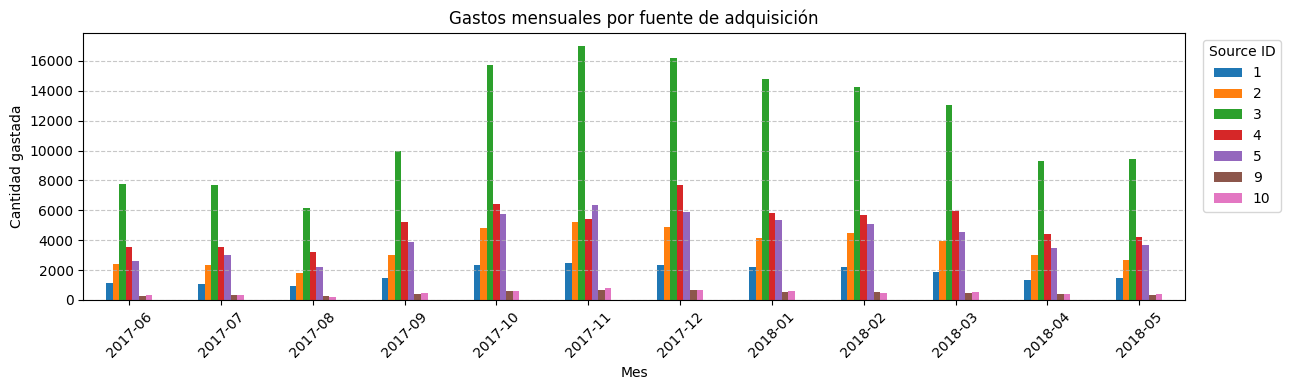

In [46]:
# Generando gráfico de barras:
monthly_costs_pivot.plot(
    kind='bar',
    title='Gastos mensuales por fuente de adquisición',
    xlabel='Mes',
    ylabel='Cantidad gastada',
    rot=45,
    figsize=(13,4)
)

plt.legend(title='Source ID', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

💡 **¿Cuánto dinero se gastó?**

- Las campañas de marketing sumaron un **gasto total** de: 329131.62

- Se observa que las fuentes de adquisición que mas gastaron fueron la 3, 4 y 5 (con 141,321.63, 61,073.60 y 51,757.10 respectivamente) 

- **A lo largo del tiempo,** se observa que entre los meses de Octubre 2017 hasta Marzo 2018 existe una alza en los gastos para las fuentes 2, 3, 4 y 5. 



#### 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [47]:
# Visitas
visits = visits_log[['start_ts', 'end_ts', 'visit_day', 'visit_month','uid','source_id','device']].query('source_id not in (6,7)') # Los canales 6 y 7 no aparecen en "costs"
print(f'Se cuenta con {len(visits)} visitas registradas en total.')

# Encontrando las primeras compras de cada cliente
first_orders = buyers.sort_values(by='buy_ts').drop_duplicates('uid')[['first_buy_ts', 'first_buy_month', 'uid']]
print(f'En total, existen {len(first_orders)} clientes que han realizado al menos una compra en ShowZ.')

Se cuenta con 359358 visitas registradas en total.
En total, existen 36523 clientes que han realizado al menos una compra en ShowZ.


In [48]:
# Relacionando primeras compras de cada cliente con todas las visitas de dicho cliente.
merged = pd.merge(
    first_orders,
    visits,
    on='uid',
    how='left'
)


# Encontrando la visita en la cual se realizó la compra
mask = (merged['first_buy_ts'] <= merged['end_ts']) & (merged['first_buy_ts'] >= merged['start_ts'])
acquisitions = merged[mask].copy()
acquisitions['source_id'] = acquisitions['source_id'].astype('int')

print(f'''Los {len(first_orders)} compradores únicos han realizado en total {len(merged)} visitas al sitio, 
pero únicamente se contabilizarán aquellas en las que se realizó la primera compra.
El total de primeras compras que tienen un registro coincidente en la tabla visits es {len(acquisitions)}.''')

Los 36523 compradores únicos han realizado en total 97394 visitas al sitio, 
pero únicamente se contabilizarán aquellas en las que se realizó la primera compra.
El total de primeras compras que tienen un registro coincidente en la tabla visits es 28893.


In [49]:
# Contando el número de usuarios mensual por fuente de atracción
customers_acquired_by_cohort = acquisitions.groupby(['source_id', 'first_buy_month']).agg({'uid':'count'}).reset_index()
customers_acquired_by_cohort = customers_acquired_by_cohort.rename(columns={'first_buy_month':'month', 'uid':'clients_count'})

# Uniendo el número de clientes adquiridos mes con mes y la inversión hecha en ese mes.
cac_df = customers_acquired_by_cohort.merge(monthly_costs, on=['month', 'source_id'], how='left')

# Calculando CAC
cac_df['cac'] = cac_df['costs'] / cac_df['clients_count']

cac_df.head()

,source_id,month,clients_count,costs,cac
0,1,2017-06,226,1125.61,4.980575
1,1,2017-07,219,1072.88,4.898995
2,1,2017-08,131,951.81,7.265725
3,1,2017-09,271,1502.01,5.542472
4,1,2017-10,409,2315.75,5.661980


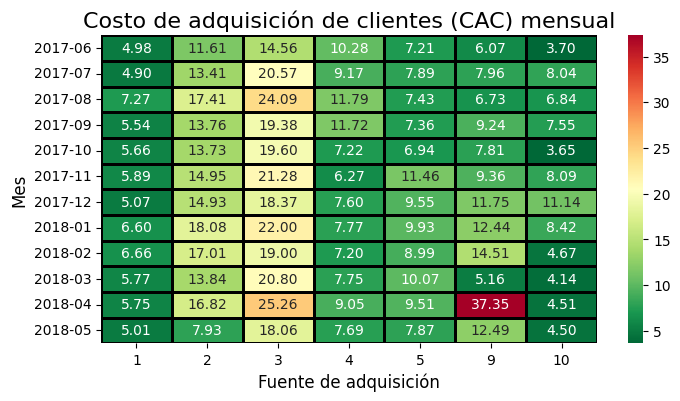

In [50]:
# Creando pivot table:
cac_pivot = cac_df.pivot_table(
    columns='source_id',
    index='month',
    values='cac'
)

# Gráfico de calor:
plt.figure(figsize=(8,4))
sns.heatmap(
    cac_pivot,
    cmap='RdYlGn_r',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gráfico con plt
plt.title("Costo de adquisición de clientes (CAC) mensual", fontsize=16)
plt.xlabel("Fuente de adquisición", fontsize=12)
plt.ylabel("Mes", fontsize=12)
plt.show()

💡 **¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

El mapa de calor presenta el costo por usuario atraido para cada fuente o canal de adquisición de clientes. 

- Los canales de adquisición **mas eficientes** son el 1 y el 10, ya que mantienen los valores de CAC bajos.

- Las fuentes 2 y 3 son visiblemente **menos efectivas** ya que tienen un CAC mes con mes mucho mas alto que el resto. 

- El valor mas alto es 37.35 y se encuentra en el mes de Abril para la fuente 9. Llama mucho la atención ya que es un valor muy alto en comparación con todos los demás. Lo que podría indicar que existió una campaña fallida.

🧠 **Conclusión**:

Ocurre algo interesante, nuestro dateframe (que relaciona a cada usuario con la fuente de atracción que lo atrajo el día de su compra) tiene una longitud de 28,893 mientras que, como vimos anteriormente, tenemos un total de 36,523 clientes (con al menos una compra). **Alrededor de 8,000 sesiones de clientes no han sido registrados en la tabla de visitas**, esto posiblemente se deba a la ausencia de información sobre otros métodos de atracción o un fallo en el registro de visitas.

A partir del análisis de CAC se recomienda: 

- Invertir más en los canales 1 y 10, que presentan buenos resultados con bajo CAC.

- Revisar las campañas de los canales 2, 3 y 9. Estos **no parecen rentables** en este punto del análisis, se debe buscar optimizar con diferente estrategias.

El siguiente paso del análisis debe ser calcular y analizar el ROMI. 



#### 3. ¿Cuán rentables eran las inversiones? (ROMI)

In [51]:
# Relacionando la tabla buyers con algunas columnas relevante de la tabla visits
buyers_visits_dirty = buyers[['uid','buy_ts','first_buy_month','age', 'revenue']].merge(visits[['uid', 'source_id', 'start_ts', 'end_ts']], on='uid', how='left')
# Filtrando registros donde 'buy_ts' esté dentro del rango 'start_ts' - 'end_ts'
    # De esta forma encontramos a qué visita específica corresponde cada compra. 
    # Y eso solo tiene sentido si la compra ocurrió durante el tiempo que el usuario estaba en el sitio.
buyers_visits_clean = buyers_visits_dirty[(buyers_visits_dirty['buy_ts'] >= buyers_visits_dirty['start_ts']) & (buyers_visits_dirty['buy_ts'] <= buyers_visits_dirty['end_ts'])].copy()
buyers_visits_clean['source_id'] = buyers_visits_clean['source_id'].astype('int')
buyers_visits = buyers_visits_clean


# Extrayendo tamaños de las cohortes (usuarios únicos) por cohorte y canal
cohort_sizes = (
    buyers_visits.groupby(['first_buy_month', 'source_id'])['uid']
    .nunique()
    .reset_index()
    .rename(columns={'uid': 'cohort_size'})
)

# Revenue acumulado por cohorte, canal y edad
ltv = (
    buyers_visits.groupby(['first_buy_month', 'source_id', 'age'])['revenue']
    .sum()
    .reset_index()
    .sort_values(by=['first_buy_month', 'source_id', 'age'])
)

# Uniendo con tamaño de la cohorte
ltv = ltv.merge(cohort_sizes, on=['first_buy_month', 'source_id'], how='left')

# Calculando LTV
ltv['ltv'] = ltv['revenue'] / ltv['cohort_size']

# Creando nuevo dataframe, que junta ltv con cac
romi_lifetime = ltv.merge(cac_df, left_on=['first_buy_month', 'source_id'], right_on=['month', 'source_id'], how='left')
# Calculando ROMI
romi_lifetime['romi'] = (romi_lifetime['ltv'] / romi_lifetime['cac'])*100

# Ajustar tipo de dato a columna "month"
romi_lifetime['month'] = romi_lifetime['month'].dt.to_timestamp()

In [52]:
romi_lifetime = romi_lifetime.dropna()

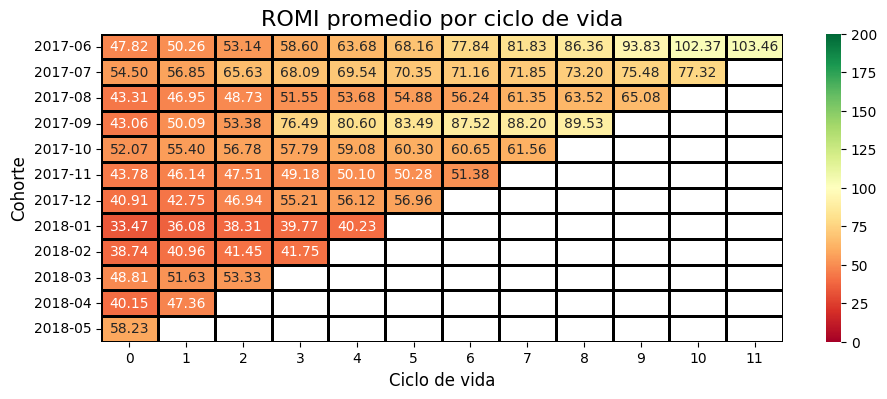

In [53]:
# ROMI promedio por ciclo de vida
romi_lifetime_pivot = romi_lifetime.pivot_table(
    columns='age',
    index='first_buy_month',
    values='romi',
    aggfunc='mean'
).cumsum(axis=1).round(2)

# Gráfico de calor:
plt.figure(figsize=(11,4))
sns.heatmap(
    romi_lifetime_pivot,
    vmin=0,
    vmax=200,
    cmap='RdYlGn',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gráfico con plt
plt.title("ROMI promedio por ciclo de vida", fontsize=16)
plt.xlabel("Ciclo de vida", fontsize=12)
plt.ylabel("Cohorte", fontsize=12)
plt.show()

💡 **¿Cuán rentables eran las inversiones? (ROMI)**

A partir del mapa de calor general, se puede observar que: 

- En general, el ROMI es bajo. La mayoría de las cohortes no logran recuperar la inversión realizada, o lo hacen muy lentamente.

- Solo la cohorte de junio de 2017 (2017-06) logró alcanzar un ROMI mayor al 100%, pero tomó alrededor de 10 meses para hacerlo.

- Aunque casi todas las cohortes inician con un ROMI aceptable, cercano al 50%, el crecimiento posterior es lento o incluso se estanca.

🧠 **Conclusión**:

- Anteriormente ya se había identificado que algunas fuentes de adquisición generan mejores resultados que otras. Ahora, al analizar el ROMI, se refuerza la importancia de evaluar individualmente el desempeño por fuente, para identificar en cuáles conviene seguir invirtiendo y en cuáles no.

##### 3.1. Análisis de ROMI por fuente de adquisición

In [54]:
# Función que genera un mapa de calor ROMI para cada fuente de adquisición de clientes
def romi_map(fuente):
    romi_source = romi_lifetime.query(f'source_id == {fuente}')

    romi_source_pivot = romi_source.pivot_table(
        columns='age',
        index='first_buy_month',
        values='romi',
        aggfunc='mean'
    ).cumsum(axis=1).round(2)

    # Gráfico de calor:
    plt.figure(figsize=(11,4))
    sns.heatmap(
        romi_source_pivot,
        vmin=0,
        vmax=150,
        cmap='RdYlGn',
        annot=True,
        fmt=".2f",
        linewidths=1,
        linecolor='black'
    )
    # Formateando gráfico con plt
    plt.title(f"ROMI Fuente {fuente} por ciclo de vida", fontsize=16)
    plt.xlabel("Ciclo de vida", fontsize=12)
    plt.ylabel("Cohorte", fontsize=12)
    plt.show()

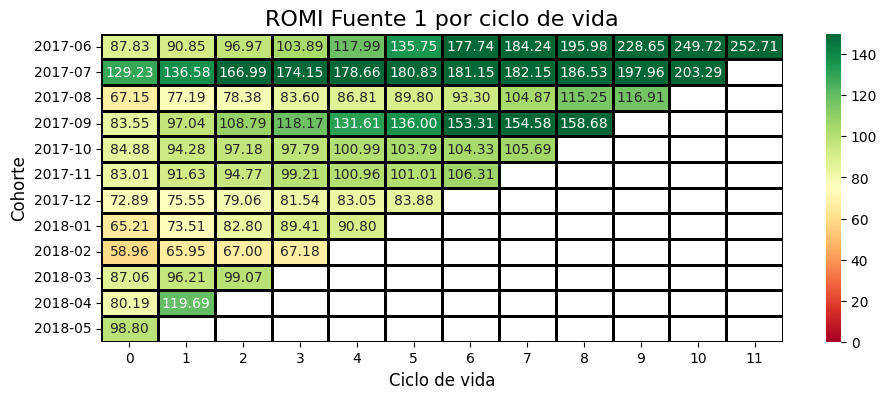

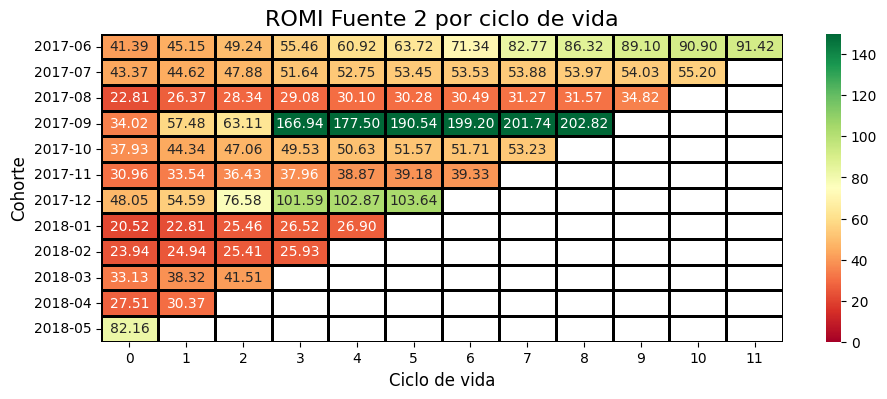

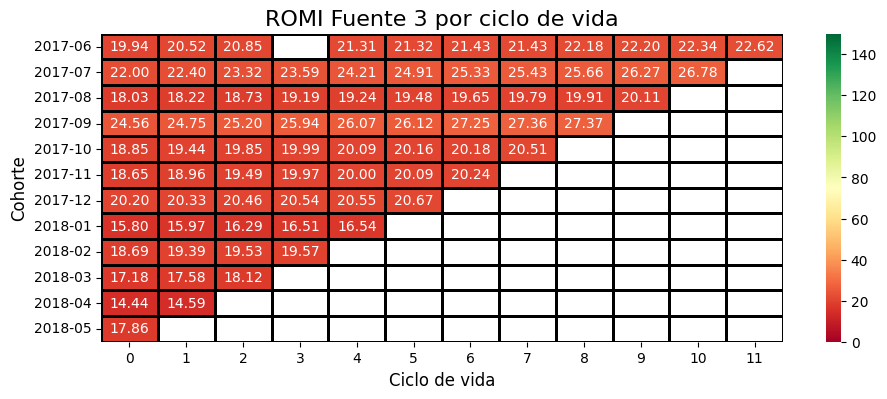

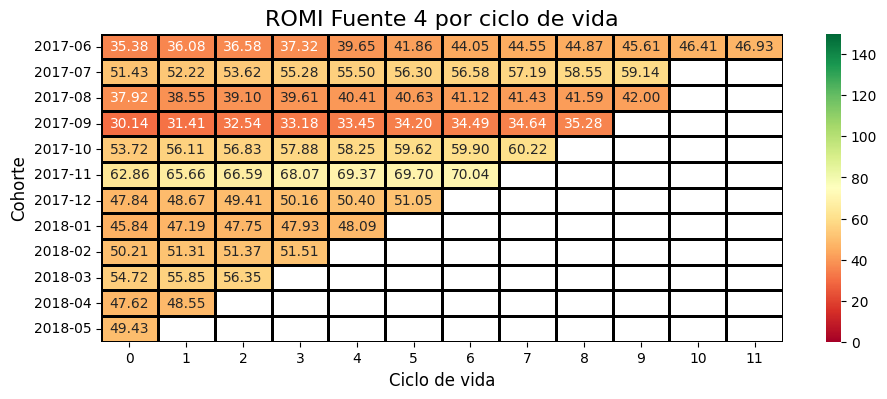

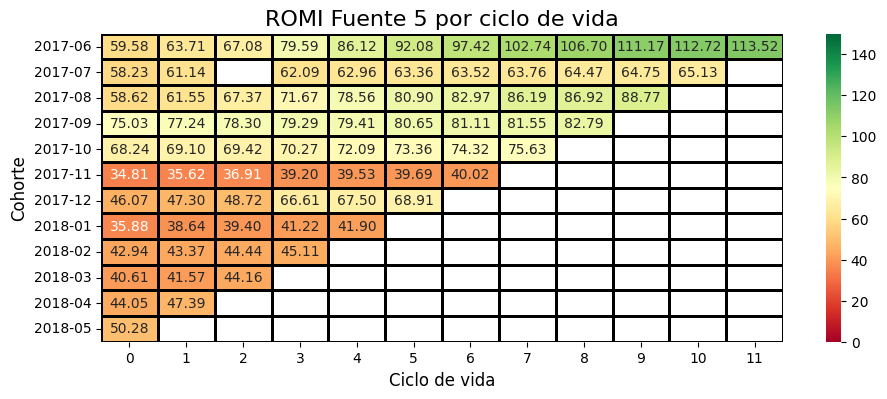

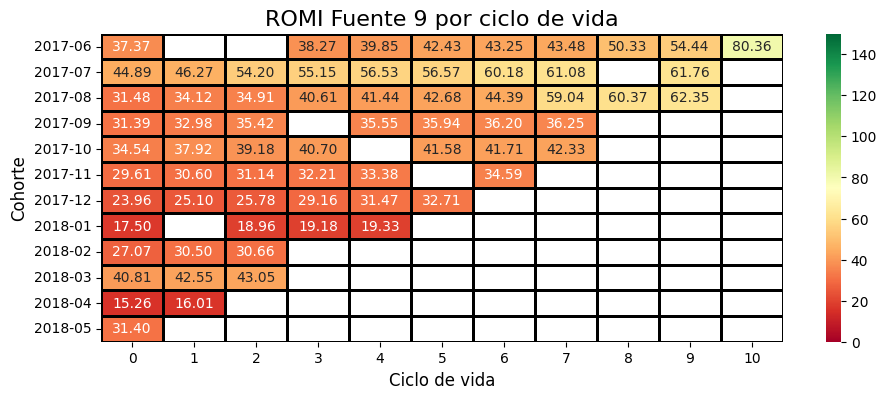

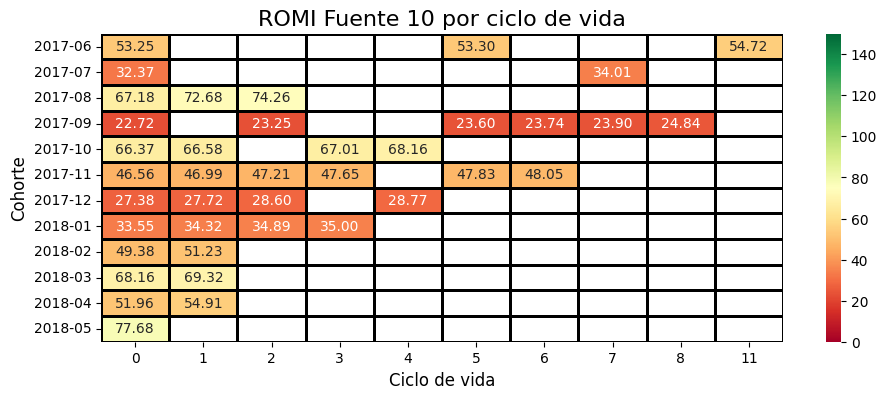

In [55]:
romi_map(1)
romi_map(2)
romi_map(3)
romi_map(4)
romi_map(5)
romi_map(9)
romi_map(10)

💡 **Análisis de ROMI por fuente de adquisición**

Se observa que cada fuente o canal de adquisición tiene un comportamiento muy diferente: mientras algunas recuperan la inversión rápidamente, otras nunca lo logran y se estancan. A continuación, se detallan observaciones específicas por fuente:

- **Funte de atracción #1:** 

Casi todas las cohortes han recuperado la inversión inicial, siendo la cohorte de diciembre de 2017 (2017-12) la que presenta el peor desempeño. Algunas cohortes incluso han alcanzado un ROMI superior al 200%. 

- **Funte de atracción #2:** 

Aunque la cohorte de septiembre de 2017 (2017-09) muestra un comportamiento sobresaliente —recuperando la inversión en el tercer mes de vida—, la mayoría de las demás cohortes nunca alcanzan el punto de recuperación, con la única excepción de la cohorte de 2017-12. A pesar de esto, si la tendencia sigue igual, muchas cohortes alcanzarán a recuperar la inversión.

- **Funte de atracción #3:** 

El ROMI es muy bajo; ninguna cohorte se acerca a recuperar la inversión y el crecimiento es extremadamente lento.

- **Funte de atracción #4:** 

Aunque no tan negativa como la fuente #3, esta fuente también presenta un bajo ROMI. Ninguna cohorte recupera la inversión y el crecimiento es igualmente lento.

- **Funte de atracción #5:** 

Esta fuente muestra un patrón interesante: las cohortes más antiguas presentan un mejor ROMI que las cohortes más recientes. A partir de la cohorte de octubre de 2017 (2017-10), se observa un cambio drástico en el comportamiento, volviéndose un canal poco recomendable.

- **Funte de atracción #9 y #10:** 

Ambas fuentes presentan un bajo ROMI. Además, en algunos meses de vida de las cohortes no se atrajo a ningún cliente, lo que indica que estos canales no son efectivos en cuanto a adquisición. El crecimiento del ROMI es lento y limitado.


## **Paso 3. Conclusión:**
---

 🧠💡 **Conclusión**:

Las fuentes de adquisición no son iguales en rentabilidad ni en eficiencia. La fuente 1 destaca claramente, mientras que otras como la 2 y 5 podrían ser recuperables si se ajustan adecuadamente. En paralelo, **la baja retención de usuarios y caída del LTV tras el primer mes limita el retorno de cualquier canal**. Por tanto, además de optimizar la inversión por canal, se recomienda:

- Diseñar estrategias de retención y fidelización, para alargar el ciclo de vida del cliente.

- Mejorar el seguimiento de visitas y campañas, ya que una parte importante de los usuarios activos no está vinculada a ningún canal conocido.

**De acuerdo al comportamiento observado en los diferentes análisis, se recomienda:**

- Invertir en la fuente de adquisición 1, es la que ha dado un mejor ROMI a lo largo de toda su implementación.

- En cuanto a la fuente 2, revisar que provocó que la cohorte 2017-09 tenga un comportamiento tan positivo. La fuente en general no es perfecta pero puede considerarse aplicar mejoras y seguir invirtiendo en ella.

- Revisar la fuente 5 para descubrir cual es la razón del cambio en el ROMI. Al inicio tuvo resultados muy buenos pero las cohortes mas jovenes no.

- Suspender momentaneamente las fuentes 4, 9 y 10. Sus comportamientos son de regulares a malos.

- Cesar inmediatamente la inversión en la fuente 3. El romi es extremadamente malo.